In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('heart_attack_prediction_indonesia.csv')
clean_df = pd.read_csv('clean_hap.csv')
# df

## Data Description (before cleaning and preprocessing)

In [8]:
df.columns

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')

In [7]:
clean_df.columns

Index(['gender_encoded', 'region_encoded', 'EKG_results_encoded', 'age',
       'income_level', 'hypertension', 'diabetes', 'cholesterol_level',
       'obesity', 'waist_circumference', 'family_history', 'smoking_status',
       'alcohol_consumption', 'physical_activity', 'dietary_habits',
       'air_pollution_exposure', 'stress_level', 'sleep_hours',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'previous_heart_disease', 'medication_usage',
       'participated_in_free_screening', 'heart_attack', 'age_group',
       'health_risk_score', 'obesity_risk_score', 'stress_to_sleep_ratio',
       'mean_arterial_pressure', 'triglyceride-hdl-ratio'],
      dtype='object')

The original dataset included 28 features:
    - Demographics: Demographics: age, gender, region, income_level
    - 


## Correlation between features and target
#### To analyze health and demographic data to identify key risk factors for heart attacks in Indonesia.

In [ ]:
corr =  df.corr()


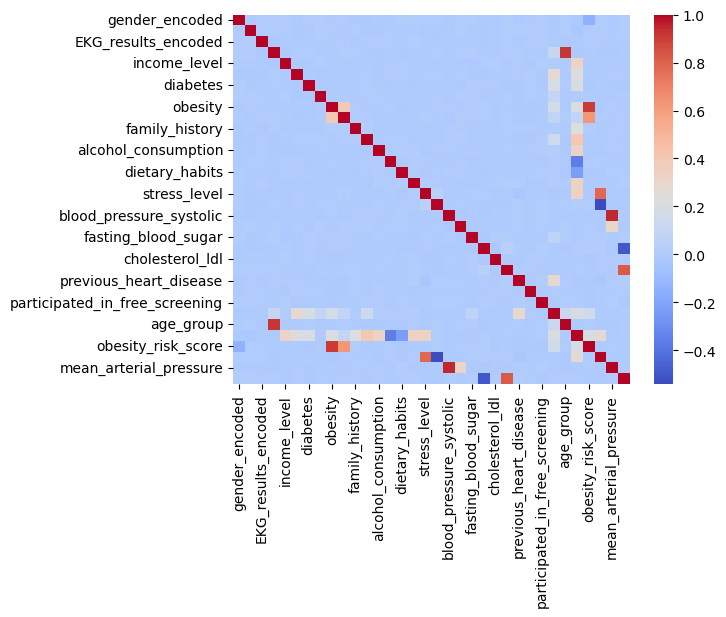

In [ ]:
sns.heatmap(corr, cmap='coolwarm')
plt.show()

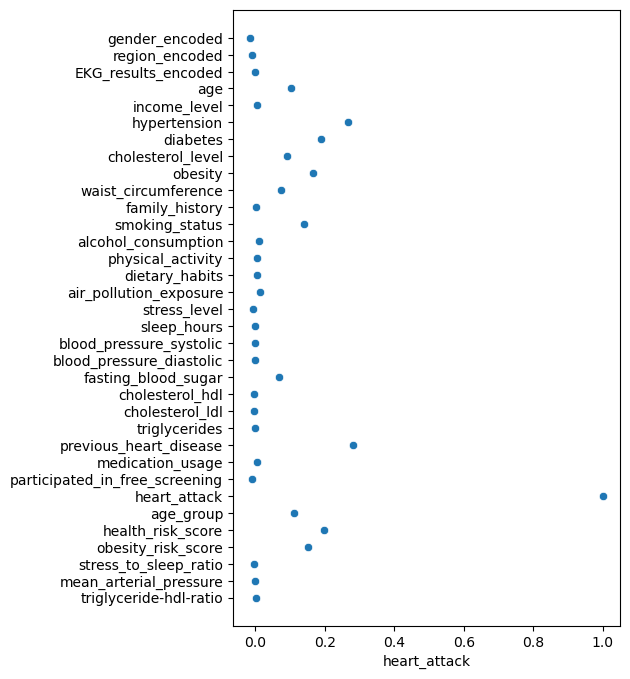

In [ ]:
plt.figure(figsize=(5,8))
sns.scatterplot(data=df.corr(), x='heart_attack', y=df.columns.tolist())
plt.show()

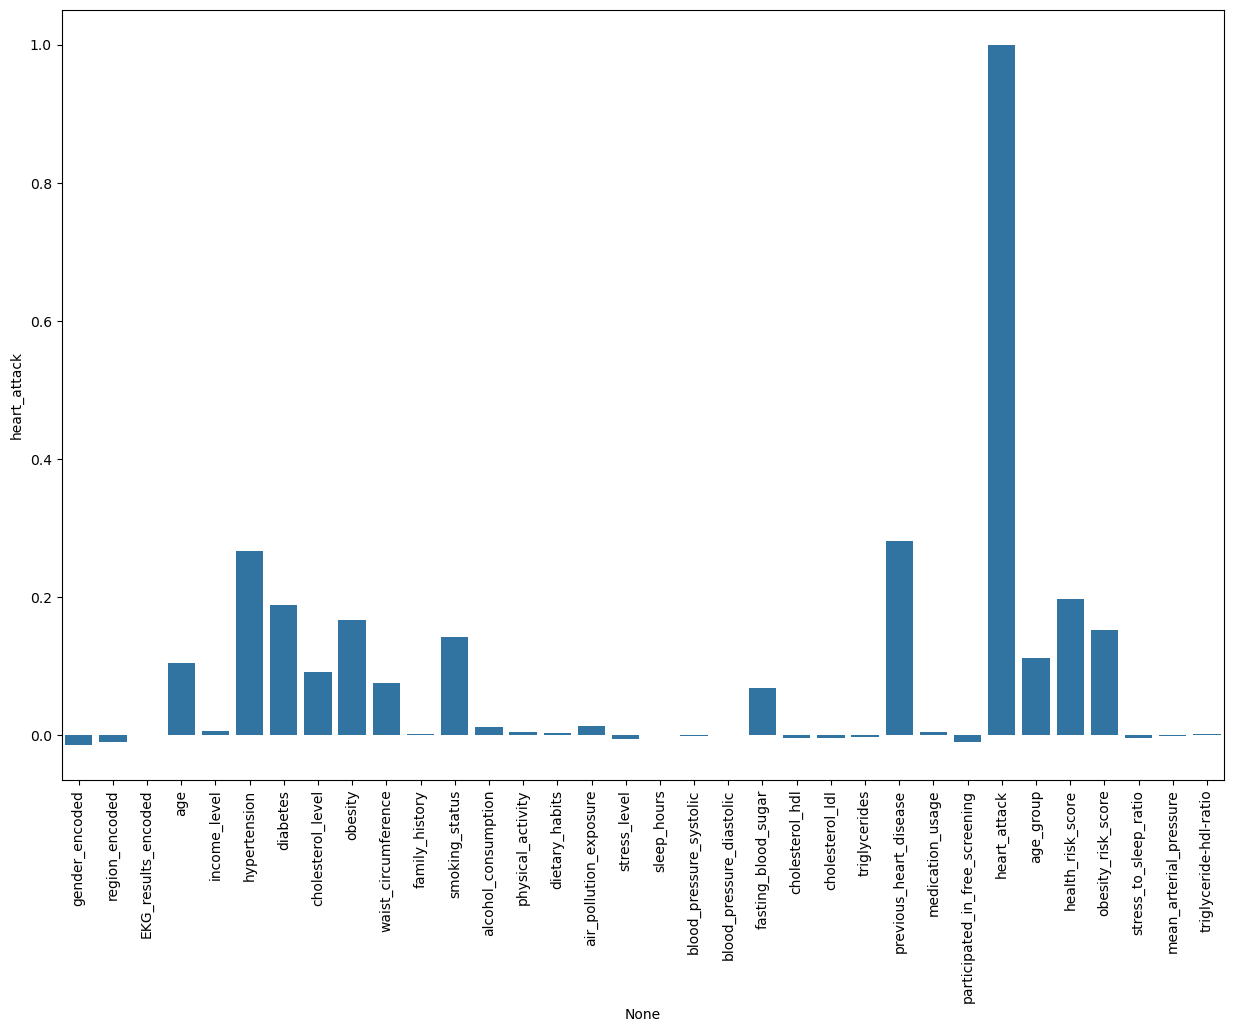

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x=corr.columns, y=corr.loc['heart_attack'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
corr_df = df.corr()[['heart_attack']].sort_values(by='heart_attack', ascending=False)
# corr_df.style.background_gradient(cmap='coolwarm', axis=None)
corr_df.head(7)

,heart_attack
heart_attack,1.000000
previous_heart_disease,0.281527
hypertension,0.266837
health_risk_score,0.197037
diabetes,0.188859
obesity,0.166300
obesity_risk_score,0.152269


the correlation analysis reveals that previous heart_disease, and hypertension have the strongest positive relationships with the likelihood of a heart attack. These are followed by moderate correlations with diabetes, obesity, and health risk score

what is health risk score?
It is calculated as the sum of multiple lifestyle and environmental variables, defined as follows:

In [ ]:
df['health_risk_score'] = (
    df['hypertension'] +
    df['diabetes'] +
    df['obesity'] +
    df['family_history'] +
    df['smoking_status'] +
    df['alcohol_consumption'] +
    (1 - df['physical_activity']) +
    (1 - df['dietary_habits']) +
    df['air_pollution_exposure'] +
    df['stress_level'] +
    df.income_level
)

This score integrates clinical conditions (e.g., hypertension, diabetes), behavioral factors (e.g., smoking, alcohol use), lifestyle habits (e.g., poor physical activity and diet), environmental exposure (e.g., air pollution), psychosocial stress, and socioeconomic context (income_level) to reflect a holistic measure of cardiovascular risk.

## Prevention Strategies

Insight: Hypertension and history of heart disease are the top two correlating features with heart attack risk.

Action:
- Mandate routine blood pressure checks in public health - screenings.
- Create a national registry or flagging system for individuals with known heart conditions to ensure they are closely monitored and follow strict treatment regimens.
- Train Puskesmas (community health centers) staff to track these variables regularly

Insight: Lifestyle factors (physical inactivity, poor diet, smoking, alcohol use, stress) strongly influence the health_risk_score.

Action:
- Launch behavioral change campaigns through schools, mosques, community groups.
- Partner with local governments to provide incentives for participation in physical activity programs.
- Subsidize access to healthier food and smoking cessation programs, especially in high-risk regions identified through health data.